### Parallel MPI simulaton of 2D Onszager-Tang Magnetohydrodynamic Vortex 

### Spin-Up MPI cluster, execute simulation code, write to cloud storage

In [1]:
import camber

In [2]:
# download Athena++ from public repo and compile
import os
os.system("git clone https://github.com/PrincetonUniversity/athena.git")

0

In [3]:
compile_job = camber.mpi.create_job(
    command="cd athena && python configure.py -b --prob=orszag_tang -mpi -hdf5 --hdf5_path=${HDF5_PATH} && make clean && make all -j$(nproc)",
    worker_size="SMALL"
)

In [6]:
compile_job

MPIJob({"job_id": 2440, "status": "COMPLETED", "worker_size": "SMALL", "job_type": "MPI", "command": "cd athena && python configure.py -b --prob=orszag_tang -mpi -hdf5 --hdf5_path=${HDF5_PATH} && make clean && make all -j$(nproc)", "file_dir": "demos/mpi_athena_demo", "with_gpu": false, "tags": null})

In [5]:
compile_job.read_logs(tail_lines=20)

(JOB 2440) - [INFO] - 2024-05-06T18:07:13.080694+00:00 mpicxx -I/opt/spack/opt/spack/linux-amzn2-x86_64_v3/gcc-7.3.1/hdf5-1.8.22-kyzrcvmcdyskgmdjlzs7z72gae25ybub/include -O3 -std=c++11 -c src/task_list/task_list.cpp -o obj/task_list.o
(JOB 2440) - [INFO] - 2024-05-06T18:07:13.084869+00:00 mpicxx -I/opt/spack/opt/spack/linux-amzn2-x86_64_v3/gcc-7.3.1/hdf5-1.8.22-kyzrcvmcdyskgmdjlzs7z72gae25ybub/include -O3 -std=c++11 -c src/task_list/time_integrator.cpp -o obj/time_integrator.o
(JOB 2440) - [INFO] - 2024-05-06T18:07:13.089750+00:00 mpicxx -I/opt/spack/opt/spack/linux-amzn2-x86_64_v3/gcc-7.3.1/hdf5-1.8.22-kyzrcvmcdyskgmdjlzs7z72gae25ybub/include -O3 -std=c++11 -c src/utils/buffer_utils.cpp -o obj/buffer_utils.o
(JOB 2440) - [INFO] - 2024-05-06T18:07:13.095949+00:00 mpicxx -I/opt/spack/opt/spack/linux-amzn2-x86_64_v3/gcc-7.3.1/hdf5-1.8.22-kyzrcvmcdyskgmdjlzs7z72gae25ybub/include -O3 -std=c++11 -c src/utils/change_rundir.cpp -o obj/change_rundir.o
(JOB 2440) - [INFO] - 2024-05-06T18:07:13.

In [7]:
# run camber with LARGE instance
job = camber.mpi.create_job(
    command="mpirun -np 32 athena/bin/athena -i athinput.orszag-tang",
    worker_size="LARGE"
)

In [10]:
job

MPIJob({"job_id": 2441, "status": "RUNNING", "worker_size": "LARGE", "job_type": "MPI", "command": "mpirun -np 32 athena/bin/athena -i athinput.orszag-tang", "file_dir": "demos/mpi_athena_demo", "with_gpu": false, "tags": null})

In [11]:
# Check the job progress
job.read_logs(tail_lines=10)

(JOB 2441) - [INFO] - 2024-05-06T18:09:06.288727+00:00 cycle=230 time=7.6986983065861075e-02 dt=3.1716091275321750e-04
(JOB 2441) - [INFO] - 2024-05-06T18:09:06.294353+00:00 cycle=231 time=7.7304143978614293e-02 dt=3.1707809277657943e-04
(JOB 2441) - [INFO] - 2024-05-06T18:09:06.380952+00:00 cycle=232 time=7.7621222071390869e-02 dt=3.1699117042069755e-04
(JOB 2441) - [INFO] - 2024-05-06T18:09:06.387574+00:00 cycle=233 time=7.7938213241811563e-02 dt=3.1690093604231007e-04
(JOB 2441) - [INFO] - 2024-05-06T18:09:06.393975+00:00 cycle=234 time=7.8255114177853871e-02 dt=3.1681378532094200e-04
(JOB 2441) - [INFO] - 2024-05-06T18:09:06.480205+00:00 cycle=235 time=7.8571927963174817e-02 dt=3.1673064540607671e-04
(JOB 2441) - [INFO] - 2024-05-06T18:09:06.485806+00:00 cycle=236 time=7.8888658608580894e-02 dt=3.1664898202917753e-04
(JOB 2441) - [INFO] - 2024-05-06T18:09:06.491457+00:00 cycle=237 time=7.9205307590610077e-02 dt=3.1657289591266262e-04
(JOB 2441) - [INFO] - 2024-05-06T18:09:06.497022

In [12]:
# list all jobs
camber.mpi.list_jobs()

[MPIJob({"job_id": 2441, "status": "RUNNING", "worker_size": "LARGE", "job_type": "MPI", "command": "mpirun -np 32 athena/bin/athena -i athinput.orszag-tang", "file_dir": "demos/mpi_athena_demo", "with_gpu": false, "tags": null}),
 MPIJob({"job_id": 2440, "status": "COMPLETED", "worker_size": "SMALL", "job_type": "MPI", "command": "cd athena && python configure.py -b --prob=orszag_tang -mpi -hdf5 --hdf5_path=${HDF5_PATH} && make clean && make all -j$(nproc)", "file_dir": "demos/mpi_athena_demo", "with_gpu": false, "tags": null}),
 MPIJob({"job_id": 2397, "status": "COMPLETED", "worker_size": "LARGE", "job_type": "MPI", "command": "mpirun -np 32 athena/bin/athena -i athinput.orszag-tang", "file_dir": "demos/mpi_athena_demo", "with_gpu": false, "tags": null}),
 MPIJob({"job_id": 2396, "status": "COMPLETED", "worker_size": "SMALL", "job_type": "MPI", "command": "cd athena && python configure.py -b --prob=orszag_tang -mpi -hdf5 --hdf5_path=${HDF5_PATH} && make clean && make all -j$(nproc)"

### Read data from cloud storage and process for visualization

In [13]:
from plot_output import plot_output

plotting OrszagTang.out2.00000.athdf...
plotting OrszagTang.out2.00001.athdf...
plotting OrszagTang.out2.00002.athdf...
plotting OrszagTang.out2.00003.athdf...
plotting OrszagTang.out2.00004.athdf...
plotting OrszagTang.out2.00005.athdf...
plotting OrszagTang.out2.00006.athdf...
plotting OrszagTang.out2.00007.athdf...
plotting OrszagTang.out2.00008.athdf...
plotting OrszagTang.out2.00009.athdf...
plotting OrszagTang.out2.00010.athdf...
plotting OrszagTang.out2.00011.athdf...
plotting OrszagTang.out2.00012.athdf...
plotting OrszagTang.out2.00013.athdf...
plotting OrszagTang.out2.00014.athdf...
plotting OrszagTang.out2.00015.athdf...
plotting OrszagTang.out2.00016.athdf...
plotting OrszagTang.out2.00017.athdf...
plotting OrszagTang.out2.00018.athdf...
plotting OrszagTang.out2.00019.athdf...
plotting OrszagTang.out2.00020.athdf...
plotting OrszagTang.out2.00021.athdf...
plotting OrszagTang.out2.00022.athdf...
plotting OrszagTang.out2.00023.athdf...
plotting OrszagTang.out2.00024.athdf...


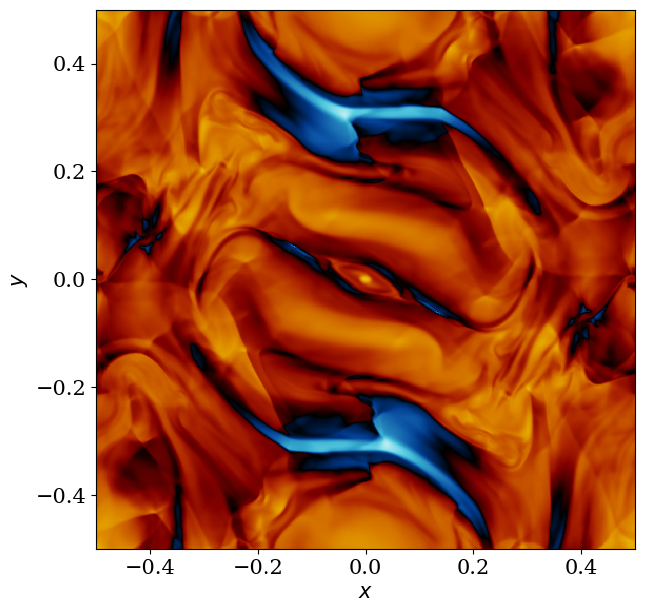

In [14]:
import os
os.system("mkdir output_images")
plot_output()

### Visualize Data

In [15]:
from IPython.display import Video
Video("density.mov")